# Preliminary operations

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from skimage import io 
from skimage import transform 
from skimage import filters 
from skimage import color
from shutil import copyfile
import copy
from google.colab import drive
import cv2
plt.rcParams['figure.figsize'] = [20, 8]

In [ ]:
drive.mount('/content/gdrive', force_remount = True)
copyfile('gdrive/My Drive/DSIM/E03/Pisa h 19.jpg', 'Pisa h 19.jpg')

Mounted at /content/gdrive


'Pisa h 19.jpg'

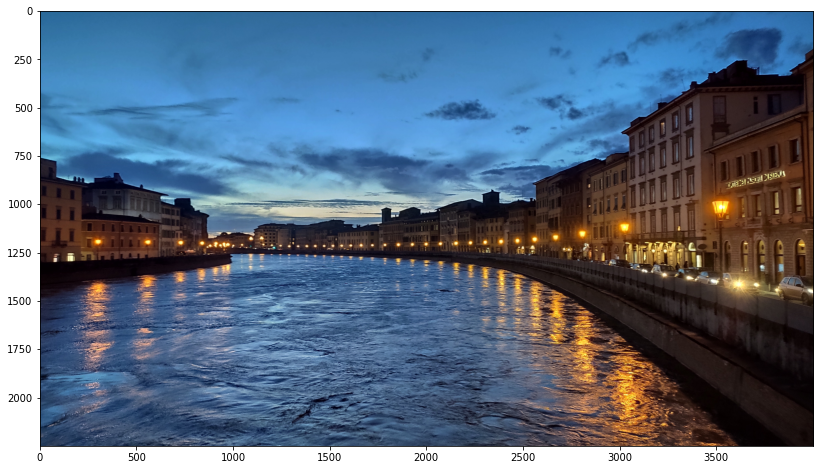

In [ ]:
im = io.imread('Pisa h 19.jpg')
plt.imshow(im)

# Conversion to YCbCr

First of all, let's convert the image from RGB to YCbCr, by means of the skimage library.

Text(0.5, 1.0, 'Cr')

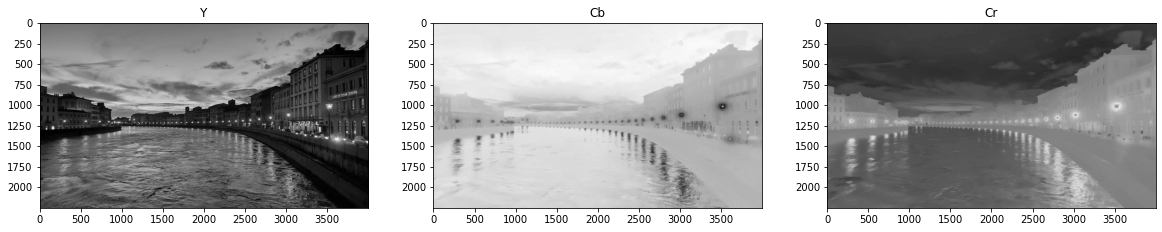

In [ ]:
im_YCC = cv2.cvtColor(im, cv2.COLOR_BGR2YCR_CB)
plt.subplot(1, 3, 1), plt.imshow(im_YCC[:,:,0], cmap = 'gray'); plt.title('Y')
plt.subplot(1, 3, 2), plt.imshow(im_YCC[:,:,1], cmap = 'gray'); plt.title('Cb')
plt.subplot(1, 3, 3), plt.imshow(im_YCC[:,:,2], cmap = 'gray'); plt.title('Cr')

# Compress CbCr

Now, let's blur the Chroma channels. We only have to blur the second and the third channel.

In [ ]:
def compress_CbCr(im_YCC, sigma = 95):
  blurred = copy.deepcopy(im_YCC)
  blurred[:,:,1] = cv2.GaussianBlur(im_YCC[:,:,1], (sigma, sigma), 0)
  blurred[:,:,2] = cv2.GaussianBlur(im_YCC[:,:,2], (sigma, sigma), 0)
  return blurred

Now we call the function above in order to see the differences.

Text(0.5, 1.0, 'Cr')

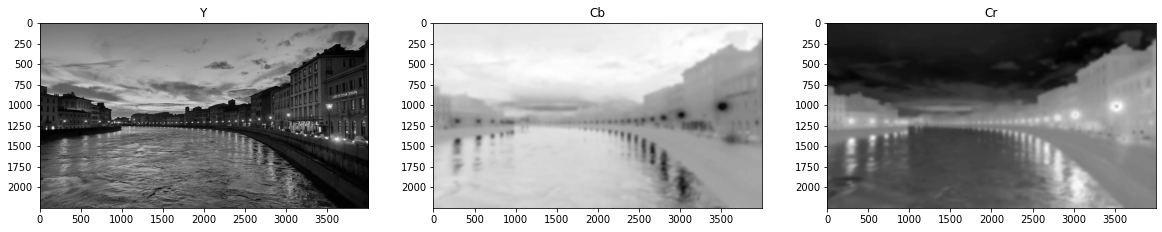

In [ ]:
im_cblur = compress_CbCr(im_YCC, sigma = 95)
plt.subplot(1, 3, 1), plt.imshow(im_cblur[:,:,0], cmap = 'gray'); plt.title('Y')
plt.subplot(1, 3, 2), plt.imshow(im_cblur[:,:,1], cmap = 'gray'); plt.title('Cb')
plt.subplot(1, 3, 3), plt.imshow(im_cblur[:,:,2], cmap = 'gray'); plt.title('Cr')

We successfully blurred the Cb and the Cr channels. Now, let's evaluate the effect of this transformation on the rebuilt image.

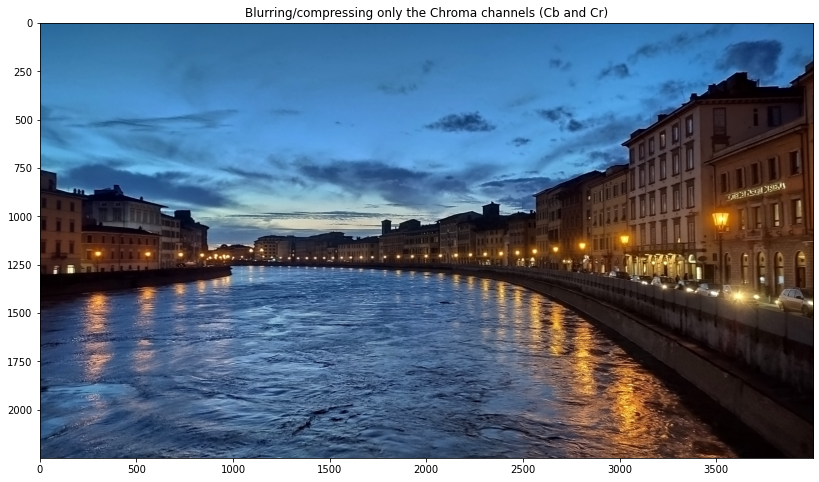

In [ ]:
im_rebuild = cv2.cvtColor(im_cblur, cv2.COLOR_YCR_CB2BGR)
plt.title('Blurring/compressing only the Chroma channels (Cb and Cr)')
plt.imshow(im_rebuild)

The image is still quite enjoyable, as the human eye can't see too much differences. Let's see if this still holds if we blur the Y channel.

# Compress Y

Now, let's blur the Luma channel. We only have to blur the first channel.

In [ ]:
def compress_Y(im_YCC, sigma = 95):
  blurred = copy.deepcopy(im_YCC)
  blurred[:,:,0] = cv2.GaussianBlur(im_YCC[:,:,0], (sigma, sigma), 0)
  return blurred

Text(0.5, 1.0, 'Cr')

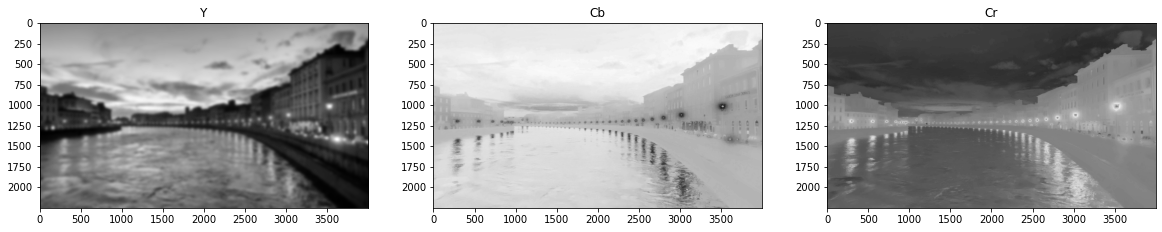

In [ ]:
im_yblur = compress_Y(im_YCC, sigma = 95)
plt.subplot(1, 3, 1), plt.imshow(im_yblur[:,:,0], cmap = 'gray'); plt.title('Y')
plt.subplot(1, 3, 2), plt.imshow(im_yblur[:,:,1], cmap = 'gray'); plt.title('Cb')
plt.subplot(1, 3, 3), plt.imshow(im_yblur[:,:,2], cmap = 'gray'); plt.title('Cr')

We successfully blurred the Y channel. Now, let's evaluate the effect of this transformation on the rebuilt image.

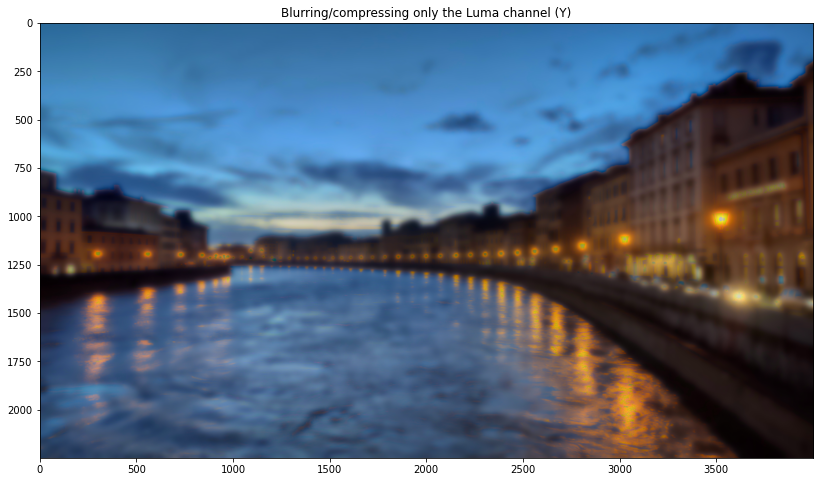

In [ ]:
im_rebuild = cv2.cvtColor(im_yblur, cv2.COLOR_YCR_CB2BGR)
plt.title('Blurring/compressing only the Luma channel (Y)')
plt.imshow(im_rebuild)

Differently from before, the image is not clear, as we have a lot of blur. The sigma parameter is the same as before, but the difference between the two rebuilt images shows the impact of blurring the Luma channel with respect to the other two (on the human eye).

# Comparison

Now we compare some different filter sizes. In particular, let's see the "limit" for both the blurring methods on the human eye comprehension.

Text(0.5, 1.0, 'Blurring Y')

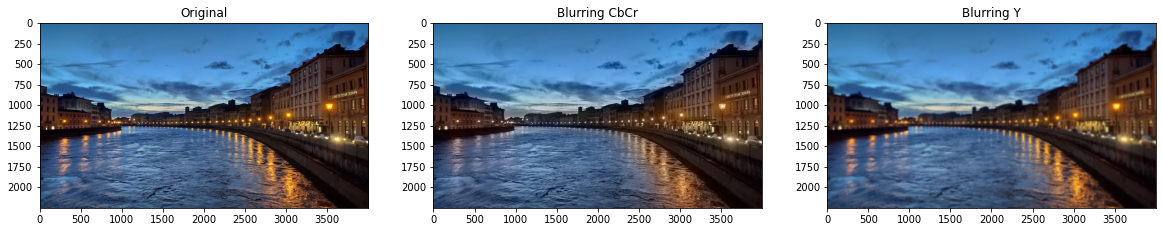

In [ ]:
im_cblur = compress_CbCr(im_YCC, sigma = 499)
im_2 = cv2.cvtColor(im_cblur, cv2.COLOR_YCR_CB2BGR)
im_yblur = compress_Y(im_YCC, sigma = 45)
im_3 = cv2.cvtColor(im_yblur, cv2.COLOR_YCR_CB2BGR)
plt.subplot(1, 3, 1), plt.imshow(im); plt.title('Original')
plt.subplot(1, 3, 2), plt.imshow(im_2); plt.title('Blurring CbCr')
plt.subplot(1, 3, 3), plt.imshow(im_3); plt.title('Blurring Y')

We can now slightly see the effect of the Chroma blurring. Also, we mitigated the blur for the Luma channel. However, the difference between the two sigma parameters is relevant and the blur of the Y channel is still more visible with respect to the other two channels.

Now, let's try to further increase the difference between the two sigma parameters.

Text(0.5, 1.0, 'Blurring Y')

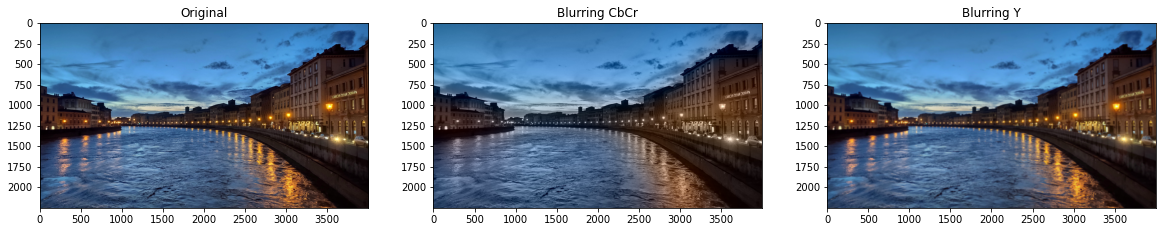

In [ ]:
im_cblur = compress_CbCr(im_YCC, sigma = 999)
im_2 = cv2.cvtColor(im_cblur, cv2.COLOR_YCR_CB2BGR)
im_yblur = compress_Y(im_YCC, sigma = 25)
im_3 = cv2.cvtColor(im_yblur, cv2.COLOR_YCR_CB2BGR)
plt.subplot(1, 3, 1), plt.imshow(im); plt.title('Original')
plt.subplot(1, 3, 2), plt.imshow(im_2); plt.title('Blurring CbCr')
plt.subplot(1, 3, 3), plt.imshow(im_3); plt.title('Blurring Y')

The blur of the colours is now quite visible, but we had to set a very high value for the filter. The Y channel instead, even with a low value of sigma, shows its impact on the final image, even if it's less noticeable then the example above.